In [22]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [23]:
# Reading data from remote link
data = pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully")
data.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
# Check if there any null value in the Dataset
data.isnull == True

False

**There is no null value in dataset, so we can now visualize dataset**

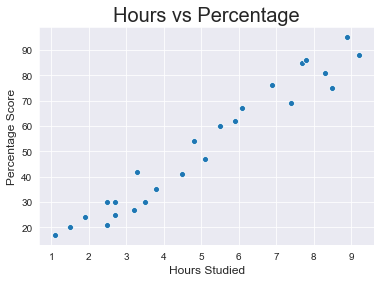

In [33]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours']) 
plt.title('Hours vs Percentage', size = 20)  
plt.xlabel('Hours Studied', size = 12)  
plt.ylabel('Percentage Score', size = 12)  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score, Lets plot a regression line to confirm the correlation.**

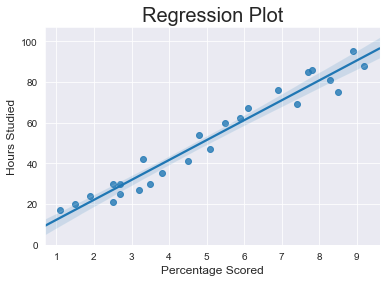

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [35]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Hours Studied', size=12)
plt.xlabel('Percentage Scored', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.








### Training the Model

### 1) Splitting the Data

In [38]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model

In [39]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


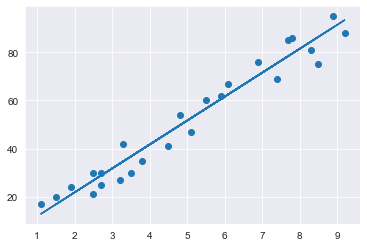

In [55]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Predicting the Percentage

In [42]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Percentage': [k for k in pred_y]})
prediction
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Comparing the Predicted Marks with the Actual Marks

In [44]:
compare_scores = pd.DataFrame({'Actual Percentage': val_y, 'Predicted Percentage': pred_y})
compare_scores
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Visually Comparing the Predicted Percentage with the Actual Percentage    

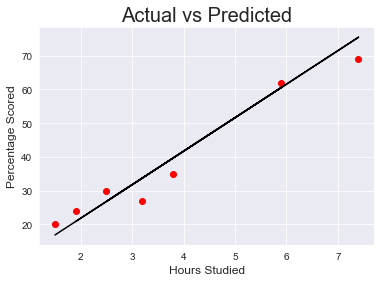

In [48]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage Scored', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluating the Model

In [49]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [50]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**